<a href="https://colab.research.google.com/github/soura2004/Stroke-Predicition/blob/main/Heart_Stroke_Prediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss

In [3]:
#Loading the dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.drop('id', axis=1, inplace=True)

# Data Preprocessing


In [5]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [7]:
df['age'].astype(int)

,age
0,67
1,61
2,80
3,49
4,79
...,...
5105,80
5106,81
5107,35
5108,51


In [8]:
#Checking for null values
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201
smoking_status,0


In [9]:
#replacing the missing values with the most frequent value
df['bmi'].fillna(df['bmi'].mode()[0], inplace=True)

/tmp/ipython-input-948015180.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mode()[0], inplace=True)


### Checking values and their count in the columns

In [10]:
print(df['ever_married'].value_counts())
print(df['work_type'].value_counts())
print(df['gender'].value_counts())
print(df['Residence_type'].value_counts())
print(df['smoking_status'].value_counts())

ever_married
Yes    3353
No     1757
Name: count, dtype: int64
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


Replacing the values in columns with numerical values.
*   Residence Type: Urban = 1, Rural = 0
*   Smoking Status: formerly smoked = 1, never smoked = 2, smokes = 3, Unknown = 0
*   Ever_Maried : Yes = 1, No = 0
*   Gender : Male = 1, Female = 0, Other = 2
*   Work Type : Private = 0, Self-employed = 1, children = 2, Govt_job = 3, Never_worked = 4



In [11]:
df['ever_married'].replace({'Yes':1, 'No':0}, inplace=True)
df['gender'].replace({'Male':1, 'Female':0,'Other':2}, inplace=True)
df['Residence_type'].replace({'Urban':1, 'Rural':0}, inplace=True)
df['smoking_status'].replace({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3}, inplace=True)
df['work_type'].replace({'Private':0, 'Self-employed':1, 'children':2, 'Govt_job':3, 'Never_worked':4}, inplace=True)

/tmp/ipython-input-3919654123.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ever_married'].replace({'Yes':1, 'No':0}, inplace=True)
/tmp/ipython-input-3919654123.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ever_married'].replace({'Yes':1, 'No':0}, inplace=True)
/tmp/ipython-inp

# Exploratory Data Analysis

Find correlation between the variables

<Axes: >

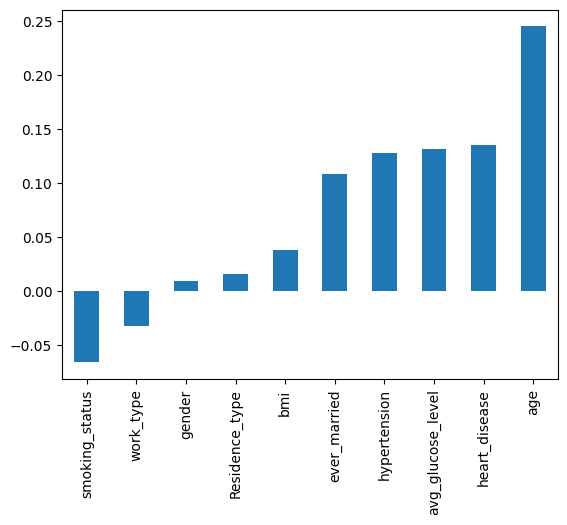

In [12]:
df.corr()['stroke'][:-1].sort_values().plot(kind='bar')

<Axes: >

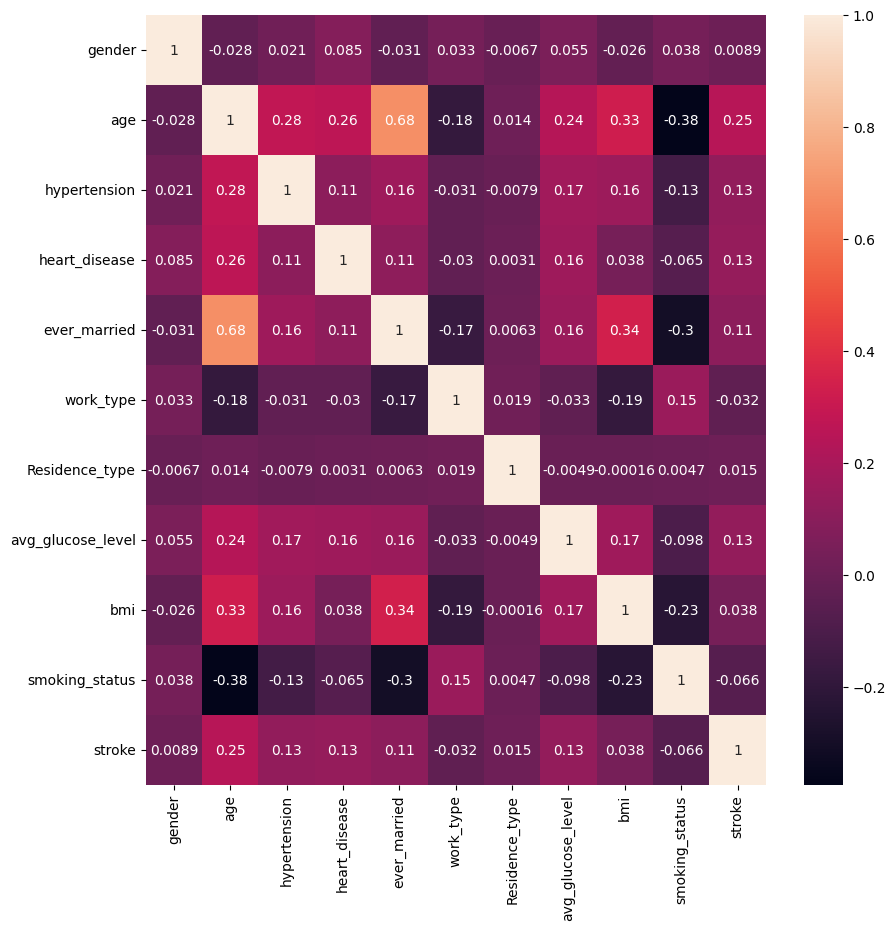

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [14]:
# replace age with number wrt to age group
# 0 = 0-12 , 1 = 13-19 , 2 = 20-30 , 3 = 31-60 , 4 = 61-100
df['age'] = pd.cut(x=df['age'], bins=[0, 12, 19, 30, 60, 100], labels=[0, 1, 2, 3,4])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,4,0,1,1,0,1,228.69,36.6,0,1
1,0,4,0,0,1,1,0,202.21,28.7,1,1
2,1,4,0,1,1,0,0,105.92,32.5,1,1
3,0,3,0,0,1,0,1,171.23,34.4,2,1
4,0,4,1,0,1,1,0,174.12,24.0,1,1


# Visualizing the data

<Axes: xlabel='gender', ylabel='count'>

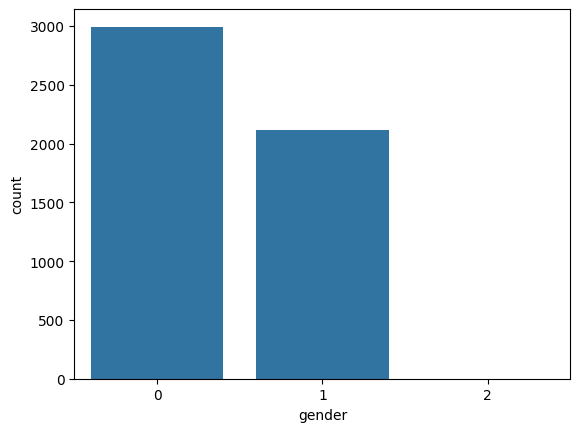

In [15]:
sns.countplot(x = 'gender', data = df)

<Axes: xlabel='Residence_type', ylabel='count'>

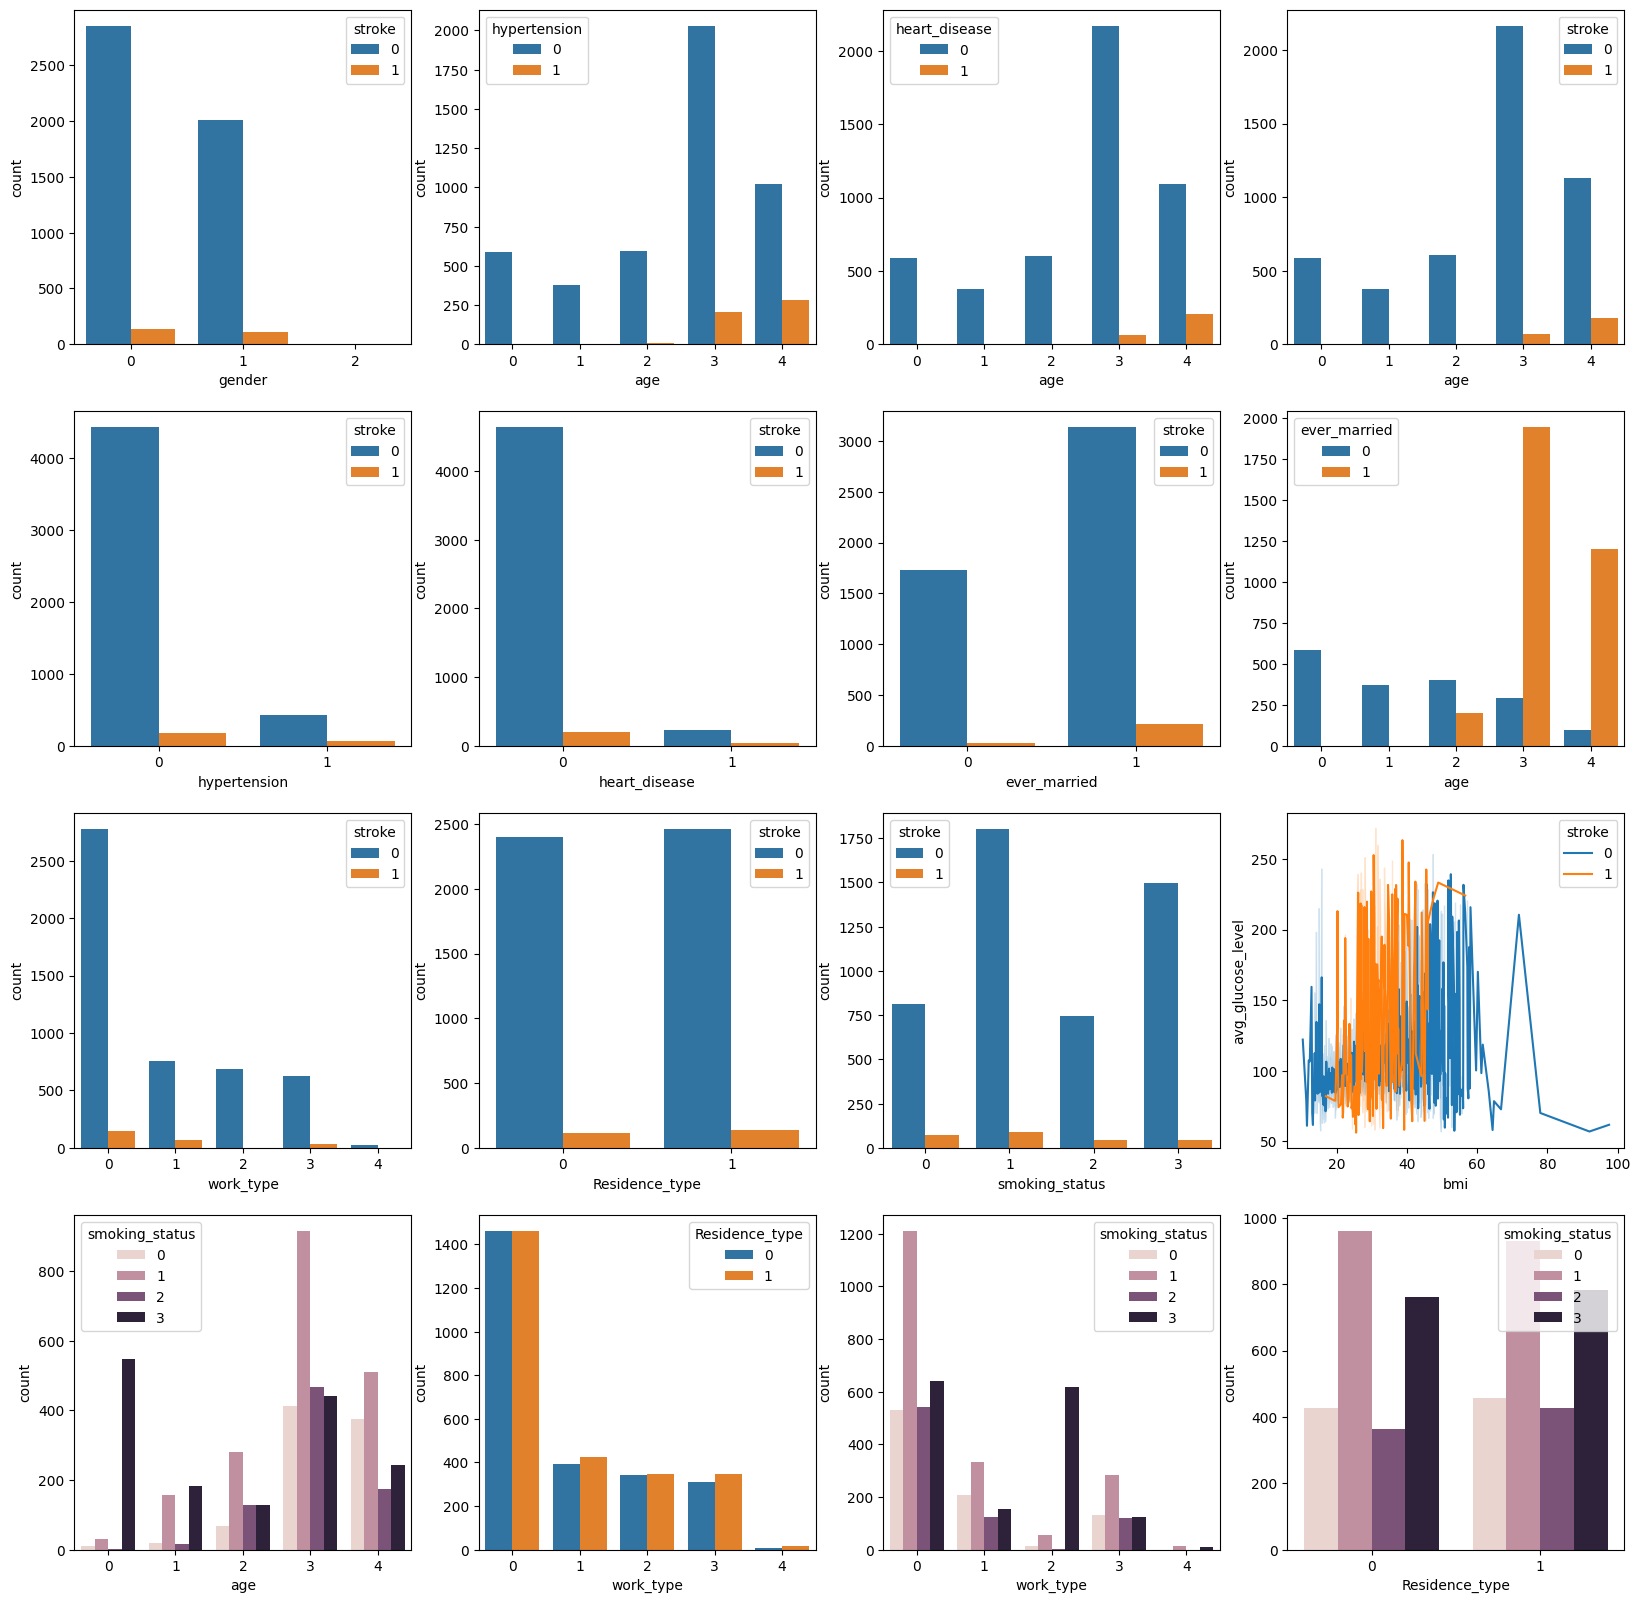

In [16]:
fig, ax = plt.subplots(4,4,figsize=(20, 20))
sns.countplot(x = 'gender', data = df,hue = 'stroke', ax=ax[0,0])
sns.countplot(x = 'age', data = df,hue = 'hypertension', ax=ax[0,1])
sns.countplot(x = 'age', data = df,hue = 'heart_disease', ax=ax[0,2])
sns.countplot(x = 'age', data = df,hue = 'stroke', ax=ax[0,3])
sns.countplot(x = 'hypertension', data = df,hue = 'stroke', ax=ax[1,0])
sns.countplot(x = 'heart_disease', data = df,hue = 'stroke', ax=ax[1,1])
sns.countplot(x = 'ever_married', data = df,hue = 'stroke', ax=ax[1,2])
sns.countplot(x = 'age', data = df,hue = 'ever_married', ax=ax[1,3])
sns.countplot(x = 'work_type', data = df,hue = 'stroke', ax=ax[2,0])
sns.countplot(x = 'Residence_type', data = df,hue = 'stroke', ax=ax[2,1])
sns.countplot(x = 'smoking_status', data = df,hue = 'stroke', ax=ax[2,2])
sns.lineplot(x = 'bmi', y = 'avg_glucose_level', data = df,hue = 'stroke', ax=ax[2,3])
sns.countplot(x = 'age', data = df,hue = 'smoking_status', ax=ax[3,0])
sns.countplot( x = 'work_type', data = df,hue = 'Residence_type', ax=ax[3,1])
sns.countplot(x = 'work_type', data = df,hue = 'smoking_status', ax=ax[3,2])
sns.countplot(x = 'Residence_type', data = df,hue = 'smoking_status', ax=ax[3,3])

# Train Test Split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('stroke', axis=1), df['stroke'], test_size=0.2, random_state=42)

# Model Training

### Logistic Regression


In [18]:
lr = LogisticRegression()

In [19]:
#training the model
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9393346379647749

In [20]:
#testing the model
lr_pred = lr.predict(X_test)
accuracy_score(y_test, lr_pred)

0.9393346379647749

### Support Vector Machine (SVM)

In [21]:
from sklearn.svm import SVC
svm = SVC()
svm

SVC()

In [22]:
#training the model
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.9393346379647749

In [23]:
#testing the model
sv_pred = svm.predict(X_test)
accuracy_score(y_test, sv_pred)

0.9393346379647749

### Decision Tree Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()


In [25]:
#training the model
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.9148727984344422

In [26]:
#testing the model
dt_pred = dt.predict(X_test)
accuracy_score(y_test, dt_pred)

0.9148727984344422

### K-Nearest Neighbors (KNN)

In [27]:
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [28]:
#training the model
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9373776908023483

In [29]:
#testing the model
knn_pred = knn.predict(X_test)
accuracy_score(y_test, knn_pred)

0.9373776908023483

# Model Evaluation

### Logistic Regression

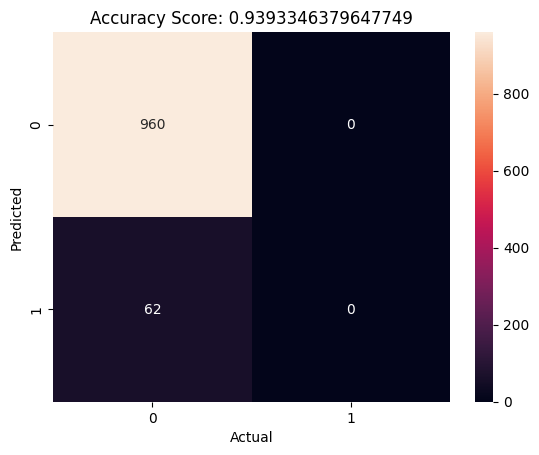

In [30]:
sns.heatmap(metrics.confusion_matrix(y_test, lr_pred), annot=True, fmt='d')
plt.title('Accuracy Score: {}'.format(accuracy_score(y_test, lr_pred)))
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

In [31]:
print('Logistic Regression Model Accuracy Score:',accuracy_score(y_test, lr_pred))
print('Logistic Regression Model F1 score: ',metrics.f1_score(y_test, lr_pred))
print('Logistic Regression Model Mean Absolute Error: ',metrics.mean_absolute_error(y_test, lr_pred))
print('Logistic Regression Model Mean Squared Error: ',metrics.mean_squared_error(y_test, lr_pred))
print('Logistic Regression Model log loss: ',log_loss(y_test, lr_pred))

Logistic Regression Model Accuracy Score: 0.9393346379647749
Logistic Regression Model F1 score:  0.0
Logistic Regression Model Mean Absolute Error:  0.060665362035225046
Logistic Regression Model Mean Squared Error:  0.060665362035225046
Logistic Regression Model log loss:  2.1866012819229588


### Support Vector Machines


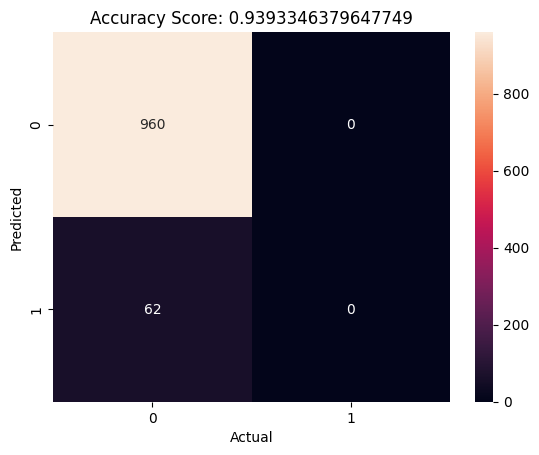

In [32]:
sns.heatmap(metrics.confusion_matrix(y_test, sv_pred), annot=True, fmt='d')
plt.title('Accuracy Score: {}'.format(accuracy_score(y_test, sv_pred)))
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

In [33]:
print('SVM Model Accuracy Score:',accuracy_score(y_test, sv_pred))
print('SVM Model F1 score: ',metrics.f1_score(y_test, sv_pred))
print('SVM Model Mean Absolute Error: ',metrics.mean_absolute_error(y_test, sv_pred))
print('SVM Model Mean Squared Error: ',metrics.mean_squared_error(y_test, sv_pred))
print('SVM Model log loss: ',log_loss(y_test, sv_pred))

SVM Model Accuracy Score: 0.9393346379647749
SVM Model F1 score:  0.0
SVM Model Mean Absolute Error:  0.060665362035225046
SVM Model Mean Squared Error:  0.060665362035225046
SVM Model log loss:  2.1866012819229588


### Decision Tree Classifier


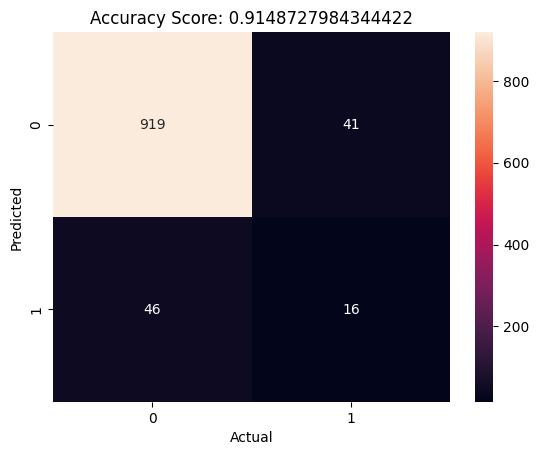

In [34]:
sns.heatmap(metrics.confusion_matrix(y_test, dt_pred), annot=True, fmt='d')
plt.title('Accuracy Score: {}'.format(accuracy_score(y_test, dt_pred)))
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

In [35]:
print('Decision Tree Model Accuracy Score:',accuracy_score(y_test, dt_pred))
print('Decision Tree Model F1 score: ',metrics.f1_score(y_test, dt_pred))
print('Decision Tree Model Mean Absolute Error: ',metrics.mean_absolute_error(y_test, dt_pred))
print('Decision Tree Model Mean Squared Error: ',metrics.mean_squared_error(y_test, dt_pred))
print('Decision Tree Model log loss: ',log_loss(y_test, dt_pred))

Decision Tree Model Accuracy Score: 0.9148727984344422
Decision Tree Model F1 score:  0.2689075630252101
Decision Tree Model Mean Absolute Error:  0.08512720156555773
Decision Tree Model Mean Squared Error:  0.08512720156555773
Decision Tree Model log loss:  3.0682953472144736


### K-Nearest Neighbors (KNN)

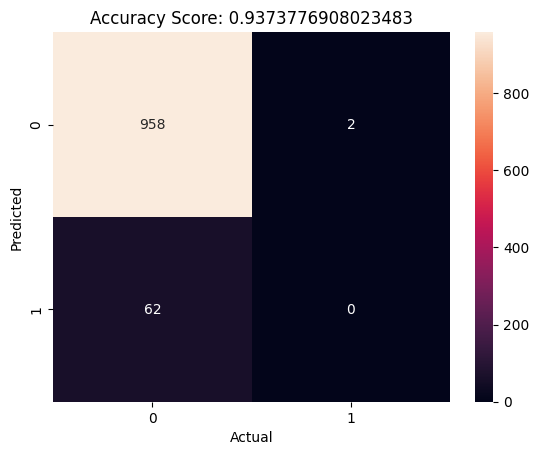

In [36]:
sns.heatmap(metrics.confusion_matrix(y_test, knn_pred), annot=True, fmt='d')
plt.title('Accuracy Score: {}'.format(accuracy_score(y_test, knn_pred)))
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

In [37]:
print('KNN Model Accuracy Score:',accuracy_score(y_test, knn_pred))
print('KNN Model F1 score: ',metrics.f1_score(y_test, knn_pred))
print('KNN Model Mean Absolute Error: ',metrics.mean_absolute_error(y_test, knn_pred))
print('KNN Model Mean Squared Error: ',metrics.mean_squared_error(y_test, knn_pred))
print('KNN Model log loss: ',log_loss(y_test, knn_pred))

KNN Model Accuracy Score: 0.9373776908023483
KNN Model F1 score:  0.0
KNN Model Mean Absolute Error:  0.06262230919765166
KNN Model Mean Squared Error:  0.06262230919765166
KNN Model log loss:  2.2571368071462796


# Model Comparison

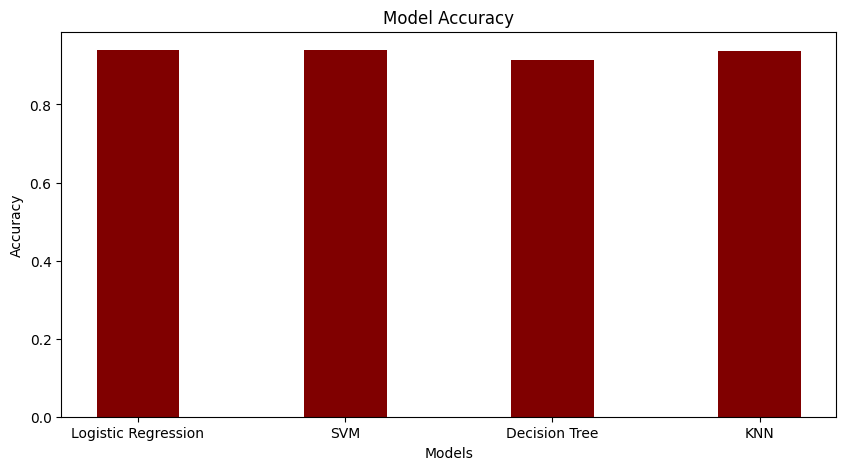

In [38]:
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN']
accuracy = [accuracy_score(y_test, lr_pred), accuracy_score(y_test, sv_pred), accuracy_score(y_test, dt_pred), accuracy_score(y_test, knn_pred)]
plt.figure(figsize=(10,5))
plt.bar(models, accuracy, color = 'Maroon', width = 0.4)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

# Conclusion


The model accuracies of Logistic Regression, SVM and KNN are quite similar i.e. 93.8 %. The accuracy of Decision Tree Classifier is 91.8 %. So, we can use any of these models to predict the heart stroke.

According to the graphs age v/s hypertension, heart disease showing chances of stroke, the number of person having a stroke shows dependece upon heart disease and hypertension. But when we plot the graph of heart disease and hypertension against the stroke, the persons with lower chances of hypertension and heart disease has increased chances of stroke. This is a peculiar thing and needs to be investigated further. In addition to that non somkers have higher chances of stroke than smokers. This is also a peculiar thing and needs to be investigated further. However person having BMI between20 to 50 have higher chances of stroke.

Last but not least other features such as martial status, residence type as well as work type are showing effect on the chances of stroke.